<a href="https://colab.research.google.com/github/Sushila-Phogat/CE888/blob/master/adult_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

colnames=['age', 'workclass', 'fnlwgt', 'education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary'] 
df1=pd.read_csv('https://raw.githubusercontent.com/Sushila-Phogat/CE888/master/Assignment1/data/adult.data', names=colnames, header=None)

df1.head(5)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
df1.replace({' <=50K': 0, ' >50K': 1}, inplace=True)
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,z-score
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,-0.56319
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,-0.56319
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,-0.56319
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,-0.56319
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,-0.56319


In [6]:
#Checking imbalance of data with help of Z-score

from statistics import *

clas_mean= df1['salary'].mean()
clas_std = df1['salary'].std()
df1['z-score'] = (df1['salary']-clas_mean)/clas_std
values_plus_minus_one_z_score = len(df1[df1['z-score'].between(-1, 1)==True])
percent_values_plus_minus_one_z_score = values_plus_minus_one_z_score/len(df1)*100
percent_values_plus_minus_one_z_score

75.91904425539757

In [7]:
df1['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

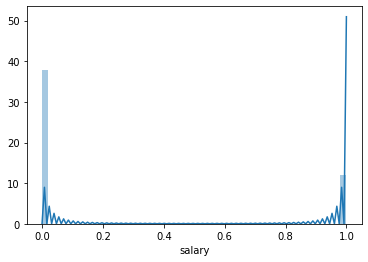

In [9]:
import seaborn as sns

sns.distplot(df1['salary'])


In [22]:
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary', 'z-score'],
      dtype='object')

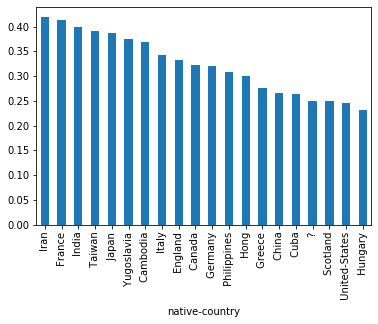

In [36]:
df1.groupby("native-country").salary.mean().sort_values(ascending=False)[:20].plot.bar()

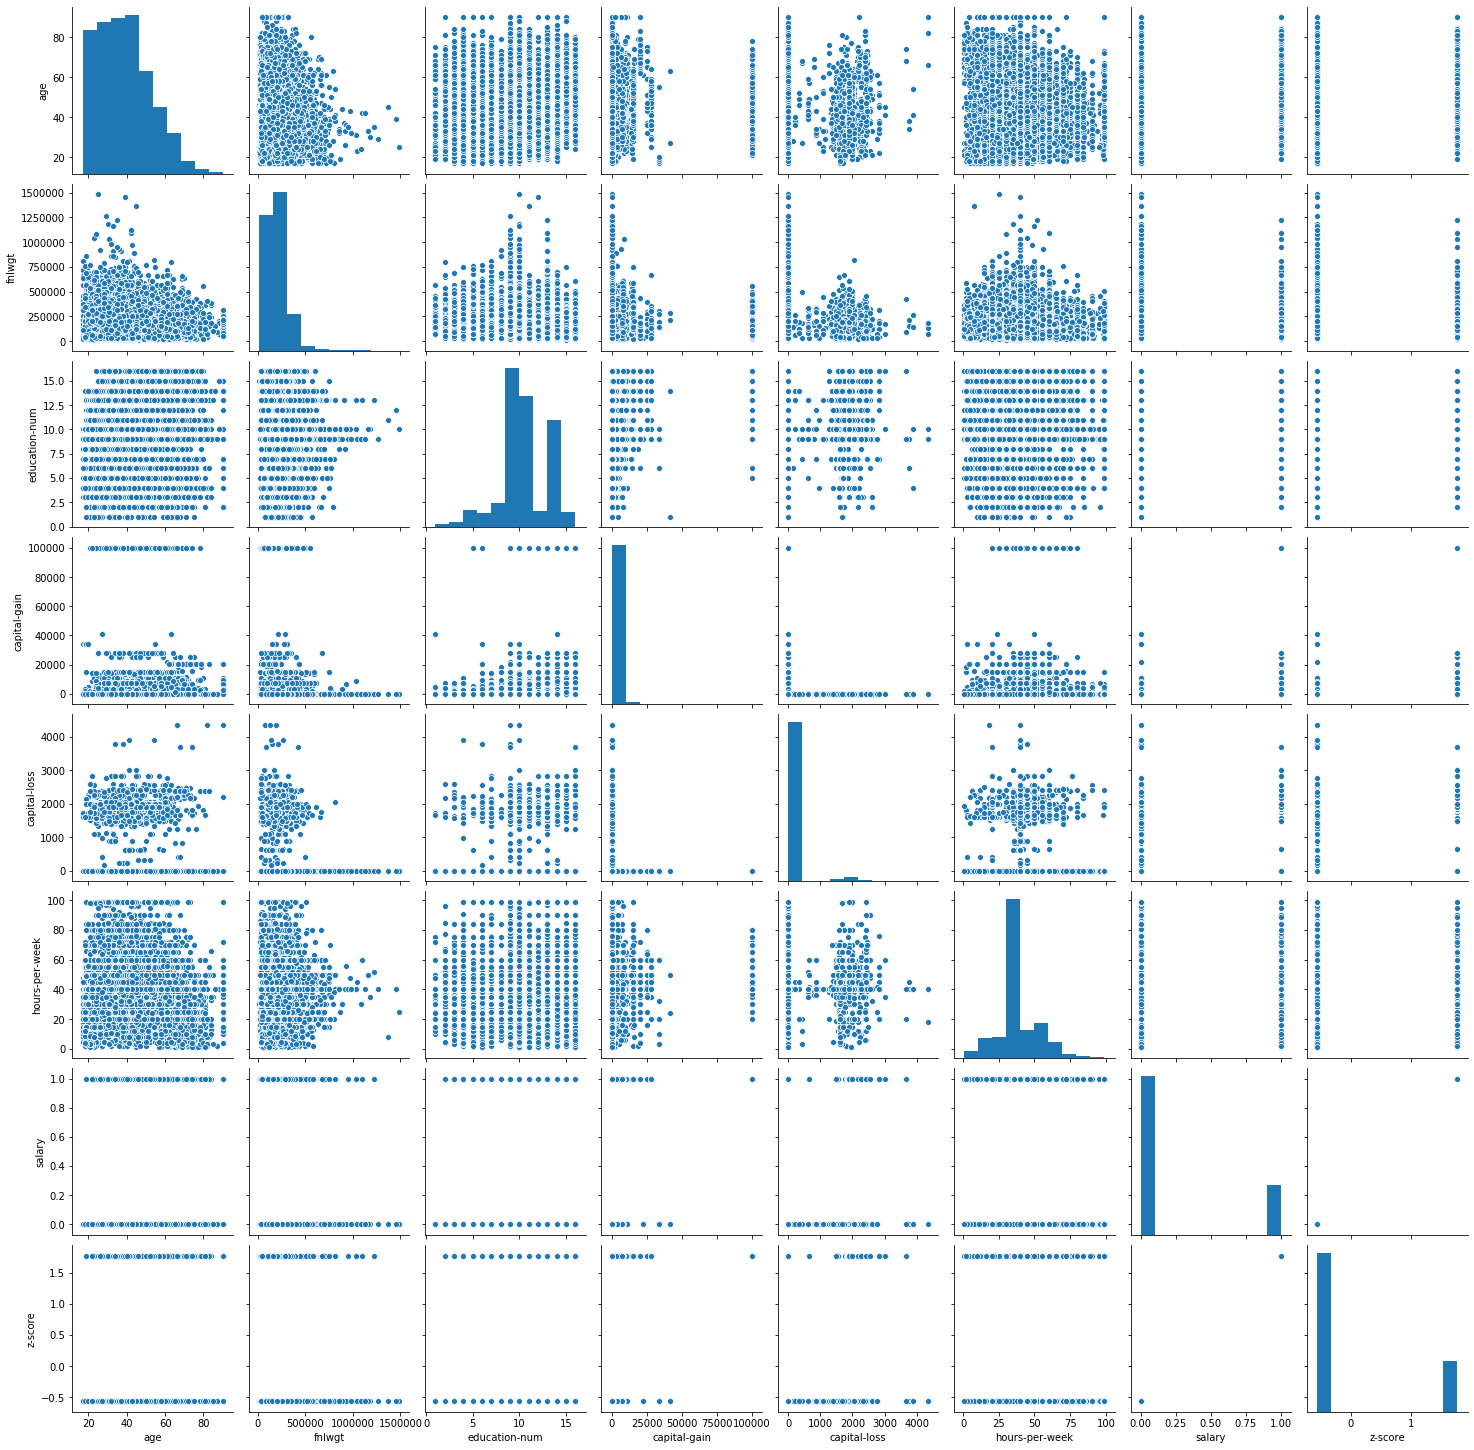

In [40]:
sns.pairplot(df1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc12efdc6d8>,
      dtype=object)

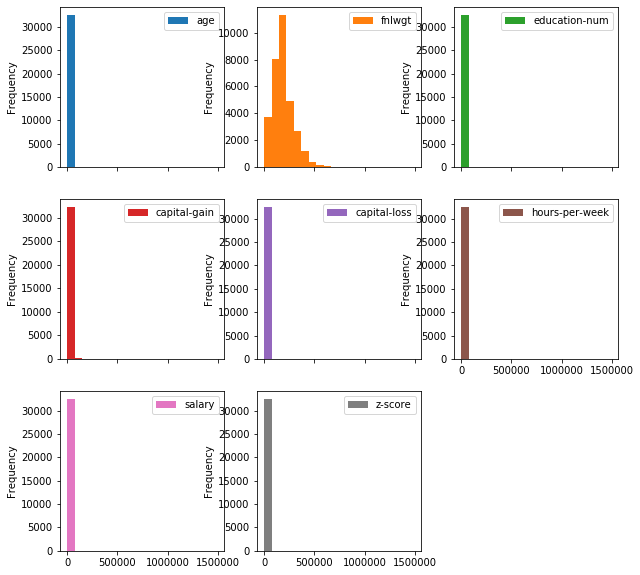

In [21]:
df1.plot.hist(subplots=True, layout=(3,3), figsize=(10, 10), bins=20)

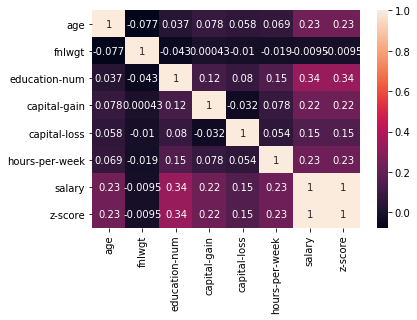

In [41]:
sns.heatmap(df1.corr(), annot=True)